# Защита персональных данных клиентов

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

В данном проекте нам необходимо защитить данные клиентов страховой компании «Хоть потоп». Разработаем такой метод преобразования данных, по которому будет сложно восстановить персональную информацию. Обоснуем корректность его работы.

Данные будем защищать так, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Работа будет произведена без подбора наилучшей модели.

## Цели проекта
- защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Признаки:**

- пол, 
- возраст
- зарплата застрахованного, 
- количество членов его семьи.
        
**Целевой признак:**

- количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# читаем данные из .csv файла с помощью метода read_csv()
try:
    df = pd.read_csv('D:\\python\\project_10\\insurance.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

# с помощью метода info() изучим структуру таблицы: типы данных, количество строк, столбцов, пропущенных данных.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [3]:
df.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


- В таблице 5000 столбцов.
- Пропусков не обнаружено.
- Тип данных в столбце Возраст можно привести в целочисленному
- Тип данных в столбце Зарплата можно привести в целочисленному
- Наименование колонок можно изменить на аналог на английском языке и привести к единому регистру

Проверим данные на дубликаты.

In [4]:
df.duplicated().sum()

153

Обнаружены дубликаты, избавимся от них.

In [5]:
df = df.drop_duplicates().reset_index(drop=True)

Повторная проверка на пропущенные значения.

In [6]:
df.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

Посмотрим описание таблицы.

In [7]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425,0.152259
std,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Переименуем столбцы.

In [8]:
df.rename(columns={'Пол': 'gender', 
                   'Возраст': 'age', 
                   'Зарплата': 'salary', 
                   'Члены семьи': 'family_members', 
                   'Страховые выплаты': 'insurance_benefits',}, inplace=True)

Приведем к целочисленному типу данные в столбцах age, salary

In [9]:
df['age']=df['age'].astype('int')
df['salary']=df['salary'].astype('int')

In [10]:
df.head()

,gender,age,salary,family_members,insurance_benefits
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


In [11]:
df.corr()

,gender,age,salary,family_members,insurance_benefits
gender,1.000000,0.001953,0.015456,-0.007315,0.011565
age,0.001953,1.000000,-0.017386,-0.009064,0.654964
salary,0.015456,-0.017386,1.000000,-0.031687,-0.013123
family_members,-0.007315,-0.009064,-0.031687,1.000000,-0.039303
insurance_benefits,0.011565,0.654964,-0.013123,-0.039303,1.000000


Не очень наглядно. Визуализируем.

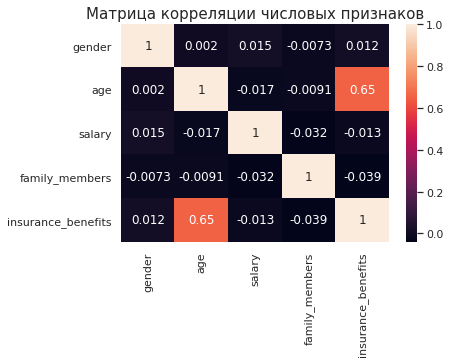

In [12]:
sns.set(font_scale=1)
sns.heatmap(df.corr(), annot=True)
plt.title('Матрица корреляции числовых признаков', fontsize=15)

plt.show()

- Заметно, что самая сильная взаимосвязь страховых выплат коррелирует с возрастом. 
- Остальные зависимости практически не выражены.

## Умножение матриц

**Ответим на вопрос, изменится ли качество линейной регрессии, если признаки умножить на обратимую матрицу?**

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** При умножении признаков $X$ (матрица признаков (нулевой столбец состоит из единиц)) на случайную обратимую матрицу ($O$) качество линейной регрессии не поменяется.

При обосновании будем учитывать формулы матричных операций:
    
$(AB)^T = B^T A^T $; $(AB)^{-1} = B^{-1}A^{-1}$; $ AE = EA = A $.

**Обоснование:**

Докажем это посредством добавления в формулу обучения $w$ произведения случайной обратимой матрицы $O$*$x$ вместо $x$.
1) $$
w2 = ((XO)^T (XO))^{-1}(XO)^Ty
$$

2) $$
 w2 = ((XO)^T XO)^{-1}(XO)^Ty
$$
3) раскроем скобки (XO)^T = O^T X^T
$$
w2 = (O^T X^T X O)^{-1} O^T X^T y
$$
4) Раскроем скобки, воспользовавшись свойством
$(ABC)^{-1} = ((AB)C)^{-1} = C^{-1}(AB)^{-1}$
$$ 
w2 = O^{-1} (O^T X^T X)^{-1} O^T X^T y 
$$
$$
w2 = O^{-1} (X^T X)^{-1} (O^T)^{-1} O^T X^T y
$$

5) 
Поскольку в условии задачи указано, что матрицу признаков умножают на *обратимую* случайную матрицу ($O$), то значит мы можем воспользоваться свойством обратимых матриц 
$ OE = EO = O $,
где $E$ - это единичная матрица.

Применяем два свойства
$ (O^T)^{-1} O^T = E $ (единичная матрица)
$ OE = EO = O $
и получаем
$$
w2 = O^{-1} (X^T X)^{-1} E X^T y
w2 = O^{-1} (X^T X)^{-1} X^T y
$$


заметим, что внутри нашей получилась формула $w$
$$
w = (X^T X)^{-1} X^T y
$$


скомпануем два выражения (подставим $w$ в нашу формулу) и получим

*Алгоритм преобразования данных для решения задачи:*

$$
w2 = O^{-1} w
$$

Подставим получившееся выражение в формулу предсказаний для линейной регрессии, которая с изменениями (добавим обратимую матрицу в обе части выражения) выглядит так 

Предсказания:

$$
a = (XO) w2
$$
$$
a = (XO) (O^{-1}w)
$$
$$
a = Xw
$$

По итогу получили то, от чего отталкивались - исходную формулу предсказаний без ухудшения качества, то есть мы доказали, что качество линейной регресии не изменится от умножения признаков на обратимую матрицу, а данные тем не менее зашифрованы путем преобразований весов линейной регрессии.



$$
w2 = O^{-1} w
$$

**Ответим на вопрос, изменится ли качество линейной регрессии, если признаки умножить на обратимую матрицу?**

b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.

Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

## Алгоритм преобразования

**Алгоритм**

*Алгоритм преобразования данных для решения задачи:*



$$
w2 = O^{-1} w
$$

где $O$ - *обратимая* случайная матрица

$w2$ - вектор весов линейной регрессии (нулевой элемент равен сдвигу), если признаки умножить на обратимую матрицу

**Обоснование**

Подставим получившееся выражение в формулу предсказаний для линейной регрессии, которая с изменениями (добавим обратимую матрицу в обе части выражения) выглядит так 

Предсказания:

$$
a = (XO) w2
$$
$$
a = (XO) (O^{-1}w)
$$
$$
a = Xw
$$

По итогу получили то, от чего отталкивались - исходную формулу предсказаний без ухудшения качества, то есть мы доказали, что качество линейной регресии не изменится от умножения признаков на обратимую матрицу, а данные тем не менее зашифрованы путем преобразований.

Необходимо выделить признаки в данных и умножить на случайную матрицу и сравнить метрики R2 в обученной модели с учетом умножения на случайную матрицу и без учета умножения на случайную матрицу.

## Проверка алгоритма

Обозначим случайную обратимую матрицу *random_matrix*.
Размеры должны быть равными признакам features -  4 признака

In [13]:
matrix_random = np.random.normal(50, size=(4,4))
matrix_random

array([[49.59757537, 51.17197652, 50.61104944, 48.39453468],
       [49.23287563, 49.68556785, 50.10037416, 49.59678127],
       [50.45401106, 50.16942182, 50.31688495, 48.68893953],
       [49.36320217, 49.77264144, 49.64065613, 49.20172427]])

Проверим матрицу на обратимость.

In [14]:
matrix_inv = np.linalg.inv(matrix_random)
try:
    matrix_inv = np.linalg.inv(matrix_random)
except:
    print('Ошибка: необратимая матрица')
matrix_inv

array([[-0.4305537 , -0.68334996,  0.67881293,  0.44058868],
       [ 0.49130767, -1.09425895, -0.67860815,  1.29133334],
       [ 0.20221221,  1.75837577,  0.44537442, -2.41212181],
       [-0.269058  ,  0.01848663, -0.44390596,  0.70561288]])

Выделяем целевой признак и признаки для обучения модели

In [15]:
features = df.drop('insurance_benefits', axis=1)
target = df['insurance_benefits']

# для удобства чтения формулы обозначим признаки и целевой признак
x = features
y = target

Сначала рассчитаем вектор весов линейной регрессии без учета умножения на случайную матрицу по формуле обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Затем получим предсказания без шифрования признаков используя стандартную формулу предсказаний:

$$
a = Xw
$$

In [16]:
w = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

a = x @ w

Аналогичные операции выполним для $w2$.

Произведем шифрование признаков $x$ путем умножения на обратимую случайную матрицу $O$:

$O$*$x$

Рассчитаем вектор весов линейной регрессии с учетом умножения на случайную матрицу по выведенной формуле:
$$
w2 = O^{-1} w
$$

Затем получим предсказания признаков с учетом шифрования используя стандартную формулу предсказаний:

$$
a = X2 w2
$$

In [17]:
x2 = x @ matrix_random

#w2 = np.linalg.inv(matrix_random) * w
w2 = np.linalg.inv(x2.T.dot(x2)).dot(x2.T).dot(y)

a2 = x2 @ w2

Сравним расхождения между предсказаниями по преобразованным a2 и исходным признакам a.
Затем вычислим сумму всех элементов вектора difference

In [18]:
difference = a - a2

difference.sum()

-0.12917547446358726

<AxesSubplot:>

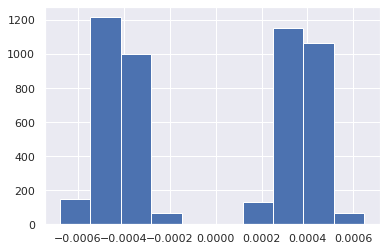

In [19]:
difference.hist()

Расхождения минимальны.

Обучим модель на первоначальных данных и посчитаем метрику R2:

In [20]:
model=LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print('Метрика R2 первоначальной модели: ', (r2_score(target, predictions)).round(4))

Метрика R2 первоначальной модели:  0.4302


Произведем преобразование данных - матрицу признаков умножим на произвольную обратимую матрицу. 
Обучим модель на преобразованных данных, посчитаем метрику R2 и сравним результаты метрики.

In [21]:
features_matrix_random = features @ matrix_inv
model.fit(features_matrix_random, target)
predictions_matrix = model.predict(features_matrix_random)
print('Метрика R2 преобразованной модели: ', (r2_score(target, predictions_matrix)).round(4))

Метрика R2 преобразованной модели:  0.4302


## Вывод

Исходя из значений полученных метрик R2, наблюдаем что качество моделей до и после преобразований не отличается, значит мы успешно справились с поставленной задачей - нам удалось зашифровать персональные данные клиентов без изменения качества модели. 

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования